# debugging lm-eval-harness
we suspect something is wrong with the batching for the MCQ datasets, leading to wacky results. This issue affects YAGO biographies, winowgrande mcq, MMLU, and hellaswag.  

I first saw some wacky behavior when [running evals for yago task 1 on just the 256 duplicates](yago_format1_indep_evals_256_dups_only.ipynb)

So we explore the issue further in this notebook:  
[independent evals for yago format 1](yago_format1_indep_evals.ipynb)

## summary of findings
there’s some small differences between the log-likelihood values returned by lm eval harness and my independent eval implementation, leading to them picking different answer choices in MCQ tasks like yago format 1 (which is what I specifically tested this with). **This affects the standard model across all duplicate counts and the perturbed/injectrange models in the zero/one duplicate categories while 256 duplicate examples seem mostly unaffected.**   

The figure below illustrates this issue. it shows lm eval harness’ NLLs vs my independent eval’s NLLs for 10 of the training examples from yago format 1. Each color is an example and each point is a variant sequence of that example (for example with nationality switched out if it was a nationality question). We would expect this to be exactly linear if the NLLs matched up but they don’t :(  
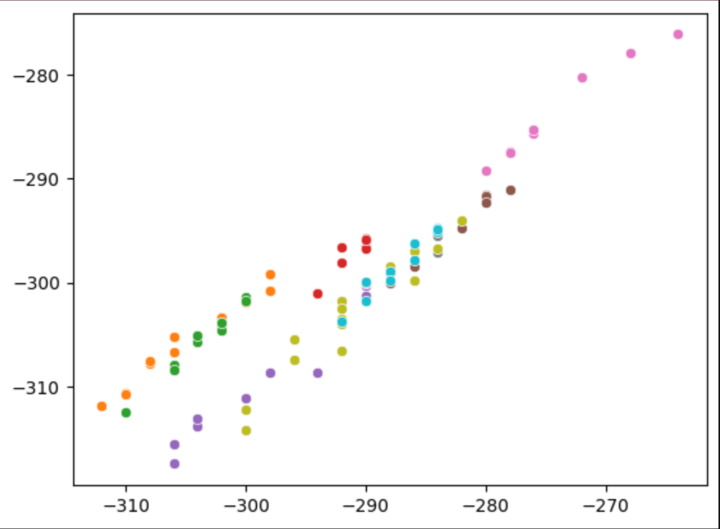  

After spending a while looking for possible reasons why, Ameya, Johnny and I were unable to find the root cause, so we’ve decided to lay this investigation to rest. 